# Time Series Analysis with Pandas

* Time series data is used in numerous data-related applications and products.
* Time series data includes data points attached to sequential time stamps.
* The frequency of these timestamps might be anything between nanosecond to month, or even longer depending on the application.
* Stock prices over time
* Daily, weekly, monthly sales
* Periodic measurements in a process
* Power or gas consumption rates over time

## Different types of time series data

<img src="Assets/datetime.png" class="juno_ui_theme_light" style="width:800px">

Pandas has 3 data types to represent different types of time series data.

* **datetime64[ns]**:  This data type is mainly used for representing timestamps. It can be on the day level such as '2022-05-20' and May 1st, 2022. The precision of a timestamp can even be on a nanosecond level.

* **timedelta64[ns]**: This data type can be used for expressing differences in times. The units can be days, hours, minutes, and so on. It can take on both positive and negative values. For instance, if we subtract a future date from today, we will end up having a negative timedelta value.

* **period[freq]**: This data type represents fixed durations such as month, quarter, and year. In a sense, it is similar to timedelta but the durations are fixed. For instance, a period[M] data type can take the value of 2022-01 but cannot be 1 month or 2 months.

## Exercise 1 - to_datetime function

* Timestamp and DatetimeIndex (an array of dates) can be created using the to_datetime function.

In [1]:
import pandas as pd

pd.to_datetime("2022-12-10")

Timestamp('2022-12-10 00:00:00')

In [2]:
dates = ["2022-12-10", "2022-12-15", "2022-12-25"]

pd.to_datetime(dates)

DatetimeIndex(['2022-12-10', '2022-12-15', '2022-12-25'], dtype='datetime64[ns]', freq=None)

## Exercise 2 - to_datetime function

In [3]:
pd.to_datetime("15-December-2022")

Timestamp('2022-12-15 00:00:00')

## Exercise 3 - to_timedelta function

* Timedelta and TimedeltaIndex can be created using the to_timedelta function

In [4]:
pd.to_timedelta(10, "D")

Timedelta('10 days 00:00:00')

In [5]:
pd.to_timedelta([1, 2, 3], "D")

TimedeltaIndex(['1 days', '2 days', '3 days'], dtype='timedelta64[ns]', freq=None)

## Exercise 4

In [6]:
pd.to_datetime("2022-12-01") + pd.to_timedelta(range(10), "D")

DatetimeIndex(['2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04',
               '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-10'],
              dtype='datetime64[ns]', freq=None)

In [7]:
pd.to_datetime("2022-12-01") + pd.to_timedelta(range(10), "H")

DatetimeIndex(['2022-12-01 00:00:00', '2022-12-01 01:00:00',
               '2022-12-01 02:00:00', '2022-12-01 03:00:00',
               '2022-12-01 04:00:00', '2022-12-01 05:00:00',
               '2022-12-01 06:00:00', '2022-12-01 07:00:00',
               '2022-12-01 08:00:00', '2022-12-01 09:00:00'],
              dtype='datetime64[ns]', freq=None)

In [8]:
import numpy as np

pd.to_datetime("2022-12-01") + pd.to_timedelta(np.arange(0, 10, 2), "D")

DatetimeIndex(['2022-12-01', '2022-12-03', '2022-12-05', '2022-12-07',
               '2022-12-09'],
              dtype='datetime64[ns]', freq=None)

## Exercise 5 - date_range function

In [9]:
pd.date_range(start="2022-12-01", periods=10, freq="D")

DatetimeIndex(['2022-12-01', '2022-12-02', '2022-12-03', '2022-12-04',
               '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
               '2022-12-09', '2022-12-10'],
              dtype='datetime64[ns]', freq='D')

In [10]:
pd.date_range(start="2022-12-01", periods=10, freq="2D")

DatetimeIndex(['2022-12-01', '2022-12-03', '2022-12-05', '2022-12-07',
               '2022-12-09', '2022-12-11', '2022-12-13', '2022-12-15',
               '2022-12-17', '2022-12-19'],
              dtype='datetime64[ns]', freq='2D')

In [11]:
pd.date_range(start="2022-12-01", periods=10, freq="M")

DatetimeIndex(['2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31',
               '2023-08-31', '2023-09-30'],
              dtype='datetime64[ns]', freq='M')

## Exercise 6 - date_range function

In [12]:
pd.date_range(start="2022-12-01", end="2023-05-01", freq="M")

DatetimeIndex(['2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31',
               '2023-04-30'],
              dtype='datetime64[ns]', freq='M')

In [13]:
pd.date_range(start="2022-12-01", end="2022-12-31", freq="10D")

DatetimeIndex(['2022-12-01', '2022-12-11', '2022-12-21', '2022-12-31'], dtype='datetime64[ns]', freq='10D')

# Resampling

* Resampling basically means representing the data with a different frequency. 
* Assume we have a temperature sensor which takes measurements every minute. If we do not need to have a minute-level precision, we can take the average of 60 minute measurements in an hour and show the changes in the temperature hourly. 
* This is down-sampling which means converting to a lower frequency.

* Resampling can be done using resample and asfreq functions.

* **resample**: Aggregates data based on specified frequency and aggregation function.
* **asfreq**: Selects data based on the specified frequency and returns the value at the end of the specified interval.

<img src="Assets/resampling.png" class="juno_ui_theme_light" style="width:400px">

## Exercise 7 - reading the data

In [14]:
df = pd.read_csv(
    
    "Data/apple_stock_prices_2022.csv", 
    usecols=["Date", "Close"],
    parse_dates=["Date"],
    index_col=["Date"]

)

df.head()

,Close
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998


## Exercise 8 - plot the data

<AxesSubplot: xlabel='Date'>

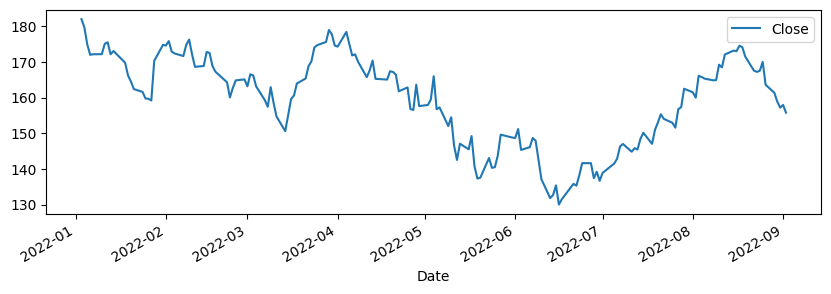

In [15]:
df.plot(
    
    figsize=(10, 3)

)

## Exercise 9 - resample the data

In [16]:
df.head()

,Close
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998


In [17]:
df.resample('10D').mean().head()

,Close
Date,
2022-01-03,175.449999
2022-01-13,168.035001
2022-01-23,165.718571
2022-02-02,173.082499
2022-02-12,170.080002


## Exercise 10 - plot original and resampled data

<AxesSubplot: title={'center': 'Down-sampled to 10-day periods'}, xlabel='Date'>

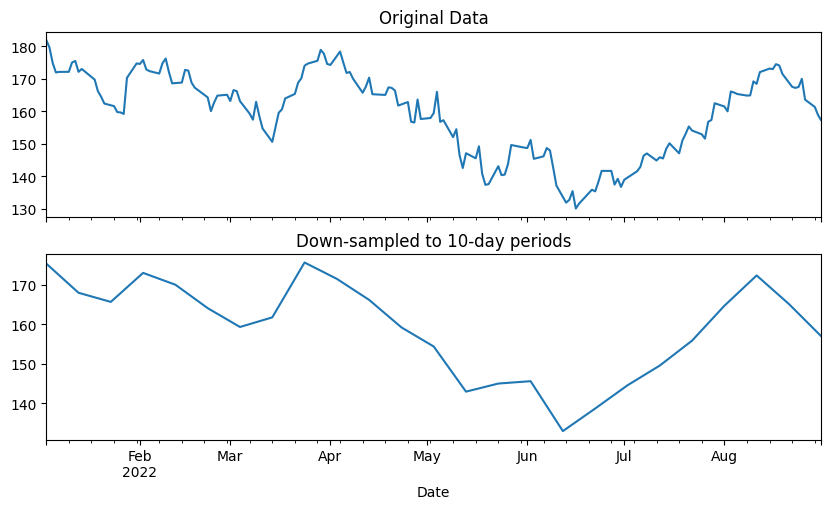

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10, 6))

df.plot(ax=ax[0], title="Original Data", legend=False)

df.resample("10D").mean().plot(ax=ax[1], title="Down-sampled to 10-day periods", legend=False)

## Exercise 11 - downsample with max

<AxesSubplot: title={'center': 'Down-sampled with max'}, xlabel='Date'>

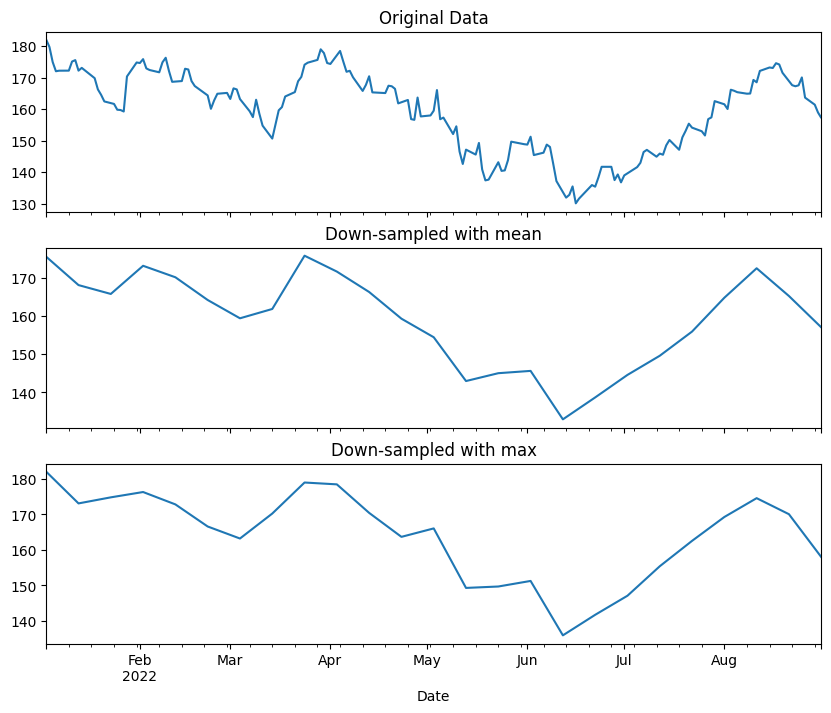

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(10, 9))

df.plot(ax=ax[0], title="Original Data", legend=False)

df.resample("10D").mean().plot(ax=ax[1], title="Down-sampled with mean", legend=False)

df.resample("10D").max().plot(ax=ax[2], title="Down-sampled with max", legend=False)

## Example 12 - asfreq function

In [20]:
df.head(10)

,Close
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998
2022-01-10,172.190002
2022-01-11,175.080002
2022-01-12,175.529999
2022-01-13,172.190002


In [21]:
df.asfreq("3D").head()

,Close
Date,
2022-01-03,182.009995
2022-01-06,172.000000
2022-01-09,NaN
2022-01-12,175.529999
2022-01-15,NaN


## Example 13 - asfreq function method parameter

In [22]:
df.head(10)

,Close
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998
2022-01-10,172.190002
2022-01-11,175.080002
2022-01-12,175.529999
2022-01-13,172.190002


In [23]:
df.asfreq("3D", method="ffill").head()

,Close
Date,
2022-01-03,182.009995
2022-01-06,172.000000
2022-01-09,172.169998
2022-01-12,175.529999
2022-01-15,173.070007


In [24]:
df.asfreq("3D", method="bfill").head()

,Close
Date,
2022-01-03,182.009995
2022-01-06,172.000000
2022-01-09,172.190002
2022-01-12,175.529999
2022-01-15,169.800003


# Shifting

* Time series data analysis may require to shift data points to make a comparison. 
* The shift and tshift functions shift data in time.

* **shift**: shifts the data
* **tshift**: shifts the time index (Deprecated since version 1.1.0: Use shift instead.)

In [25]:
sample_data = df.iloc[:10, :]

sample_data.head()

,Close
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998


## Exercise 14 - shift

In [26]:
from IPython.display import display_html
from itertools import chain, cycle

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [27]:
display_side_by_side(sample_data, sample_data.shift(3), titles=["original", "shifted"])

,Close
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998
2022-01-10,172.190002
2022-01-11,175.080002
2022-01-12,175.529999
2022-01-13,172.190002


## Exercise 15 - plot shifted data

* tight_layout function of matplotlib allows to adjust the gap between subplots using the pad parameter.

<AxesSubplot: title={'center': 'Shifted Data'}, xlabel='Date'>

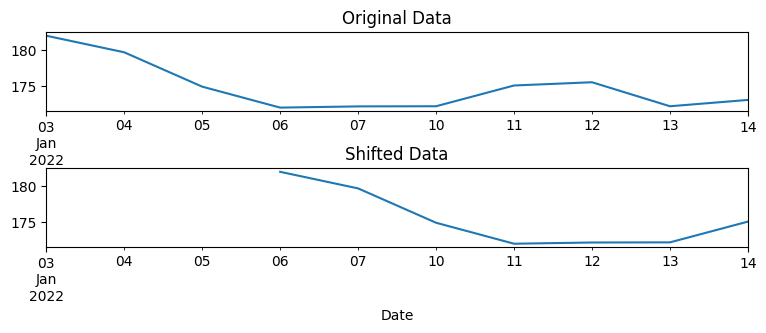

In [28]:
fig, ax = plt.subplots(nrows=2, figsize=(8, 3), sharey=True)
fig.tight_layout(pad=2)

sample_data.plot(ax=ax[0], title="Original Data", legend=None)
sample_data.shift(3).plot(ax=ax[1], title="Shifted Data", legend=None)

## Exercise 16 - shift backwards

In [29]:
sample_data.shift(-3)

,Close
Date,
2022-01-03,172.000000
2022-01-04,172.169998
2022-01-05,172.190002
2022-01-06,175.080002
2022-01-07,175.529999
2022-01-10,172.190002
2022-01-11,173.070007
2022-01-12,NaN
2022-01-13,NaN


In [30]:
display_side_by_side(sample_data, sample_data.shift(-3), titles=["original", "back-shifted"])

,Close
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998
2022-01-10,172.190002
2022-01-11,175.080002
2022-01-12,175.529999
2022-01-13,172.190002


# Rolling

* Rolling is a very useful operation for time series data. 
* Rolling means creating a rolling window with a specified size and perform calculations on the data in this window which, of course, rolls through the data.

<img src="Assets/rolling.png" class="juno_ui_theme_light" style="width:400px">

* It is worth noting that the calculation starts when the whole window is in the data. 
* In other words, if the size of the window is three, the first aggregation is done at the third row.

## Exercise 17 - rolling function

In [31]:
sample_data.rolling(3).mean()

,Close
Date,
2022-01-03,NaN
2022-01-04,NaN
2022-01-05,178.876663
2022-01-06,175.539998
2022-01-07,173.029999
2022-01-10,172.120000
2022-01-11,173.146667
2022-01-12,174.266668
2022-01-13,174.266668


In [32]:
display_side_by_side(sample_data, sample_data.rolling(3).mean(), titles=["original", "rolling with 3-day window"])

,Close
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998
2022-01-10,172.190002
2022-01-11,175.080002
2022-01-12,175.529999
2022-01-13,172.190002


In [33]:
(182.009995 + 179.699997 + 174.919998) / 3

178.87666333333334

## Exercise 18 - plot rolling data

In [34]:
df.head()

,Close
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998


In [35]:
df.shape

(169, 1)

<AxesSubplot: title={'center': 'rolling with 3-day window'}, xlabel='Date'>

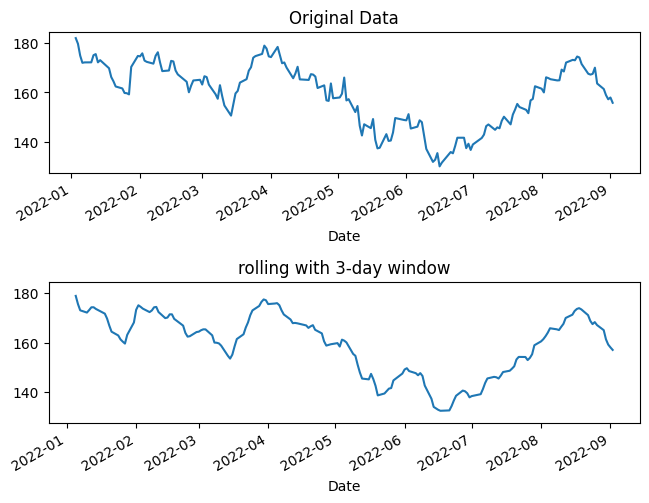

In [36]:
fig, ax = plt.subplots(nrows=2, figsize=(8, 6), sharey=True)
fig.tight_layout(pad=6)

df.plot(ax=ax[0], title="Original Data", legend=None)
df.rolling(3).mean().plot(ax=ax[1], title="rolling with 3-day window", legend=None)